In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
from gurobipy import *

https://pythontic.com/visualization/signals/fouriertransform_fft

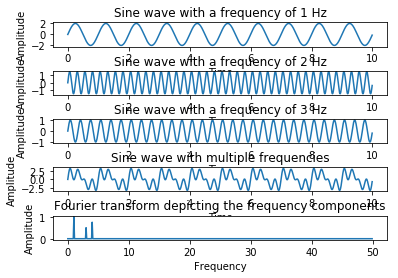

In [2]:
# How many time points are needed i,e., Sampling Frequency
sampling_frequency   = 100;

# At what intervals time points are sampled
sampling_interval       = 1 / sampling_frequency;

# Begin time period of the signals
begin_time           = 0;

# End time period of the signals
end_time             = 10; 

# Frequency of the signals (in Hz)
signal_1_frequency     = 1;
signal_2_frequency     = 4;
signal_3_frequency     = 3;

#Amplitude of the signals (in dB)
signal_1_amplitude     = 2;
signal_2_amplitude     = 1.5;
signal_3_amplitude     = 1;

# Time points
time        = np.arange(begin_time, end_time, sampling_interval);

# Create three sine waves
signal_1 = signal_1_amplitude*np.sin(2*np.pi*signal_1_frequency*time)
signal_2 = signal_2_amplitude*np.sin(2*np.pi*signal_2_frequency*time)
signal_3 = signal_3_amplitude*np.sin(2*np.pi*signal_3_frequency*time)

# Create subplot
figure, axis = plt.subplots(5, 1)
plt.subplots_adjust(hspace=1) 

# Time domain representation for sine wave 1
axis[0].set_title('Sine wave with a frequency of 1 Hz')
axis[0].plot(time, signal_1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')

# Time domain representation for sine wave 2
axis[1].set_title('Sine wave with a frequency of 2 Hz')
axis[1].plot(time, signal_2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')

# Time domain representation for sine wave 3
axis[2].set_title('Sine wave with a frequency of 3 Hz')
axis[2].plot(time, signal_3)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')
 
# Add the sine waves
signal = signal_1 + signal_2 + signal_3

# Time domain representation of the resultant sine wave
axis[3].set_title('Sine wave with multiple frequencies')
axis[3].plot(time, signal)
axis[3].set_xlabel('Time')
axis[3].set_ylabel('Amplitude')

# Frequency domain representation
fourier_transform = fft(signal)/len(signal)           # Normalize amplitude
fourier_transform = fourier_transform[range(int(len(signal)/2))] # Exclude sampling frequency

tp_count     = len(signal)
values      = np.arange(int(tp_count/2))
time_period  = tp_count/sampling_frequency
frequencies = values/time_period
 
# Frequency domain representation
axis[4].set_title('Fourier transform depicting the frequency components')
axis[4].plot(frequencies, abs(fourier_transform))
axis[4].set_xlabel('Frequency')
axis[4].set_ylabel('Amplitude')

plt.show()

Text(0, 0.5, 'Amplitude')

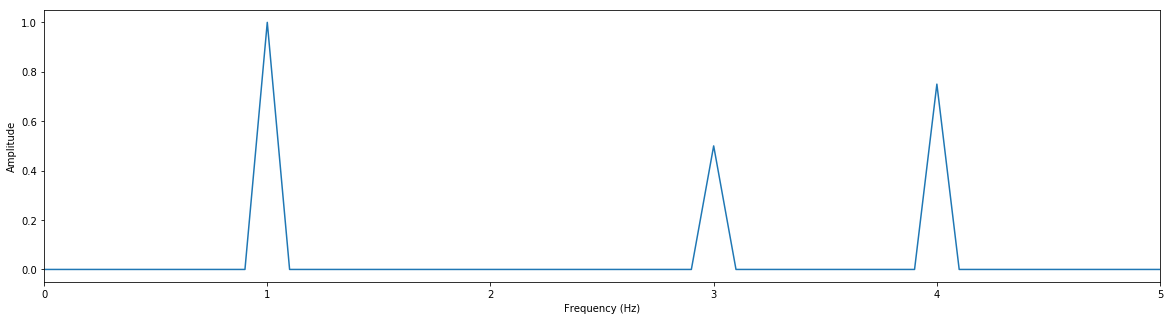

In [3]:
# Plot Mischsignal
plt.figure(figsize=(20,5))
plt.plot(frequencies, abs(fourier_transform))
plt.xlim(0, 5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

In [4]:
index_1 = 10
index_2 = 20
index_3 = 30

ampl_1 = abs(fourier_transform[index_1])
ampl_2 = abs(fourier_transform[index_2])
ampl_3 = abs(fourier_transform[index_3])
print('Amplitude bei Index {}: {}'.format(index_1, ampl_1))
print('Amplitude bei Index {}: {}'.format(index_2, ampl_2))
print('Amplitude bei Index {}: {}'.format(index_3, ampl_3))

Amplitude bei Index 10: 1.0
Amplitude bei Index 20: 9.607764531471059e-17
Amplitude bei Index 30: 0.5


In [5]:
print('Frequenz bei Index {}: {}Hz'.format(index_1, frequencies[index_1]))
print('Frequenz bei Index {}: {}Hz'.format(index_2, frequencies[index_2]))
print('Frequenz bei Index {}: {}Hz'.format(index_3, frequencies[index_3]))

Frequenz bei Index 10: 1.0Hz
Frequenz bei Index 20: 2.0Hz
Frequenz bei Index 30: 3.0Hz


In [6]:
fourier_list = list(abs(fourier_transform))
ampl_peaks = list(filter(lambda i: i > 0.2, fourier_list))
ampl_peaks

[1.0, 0.5, 0.7499999999999998]

In [7]:
for x in range(len(ampl_peaks)):
    index = fourier_list.index(ampl_peaks[x])
    print('Frequenz bei Index {0}: {1}Hz mit einer Amplitude von: {2:0.2f}dB'
          .format(index, frequencies[index], ampl_peaks[x]))

Frequenz bei Index 10: 1.0Hz mit einer Amplitude von: 1.00dB
Frequenz bei Index 30: 3.0Hz mit einer Amplitude von: 0.50dB
Frequenz bei Index 40: 4.0Hz mit einer Amplitude von: 0.75dB


Text(0, 0.5, 'Amplitude')

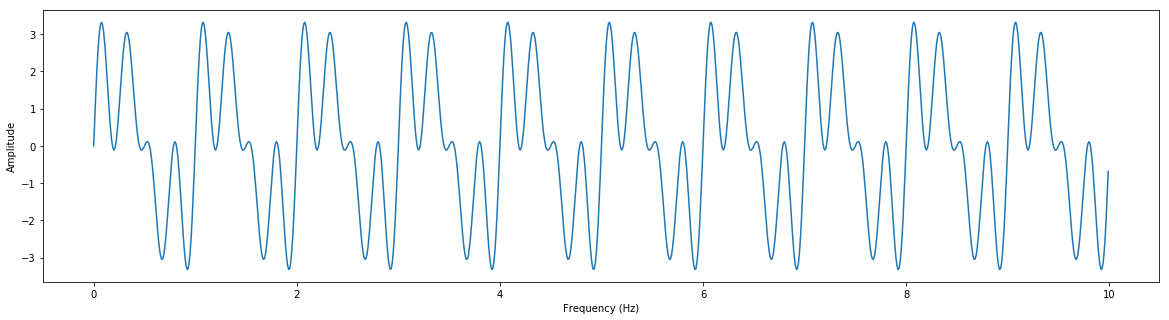

In [8]:
plt.figure(figsize=(20,5))
plt.plot(time, signal)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

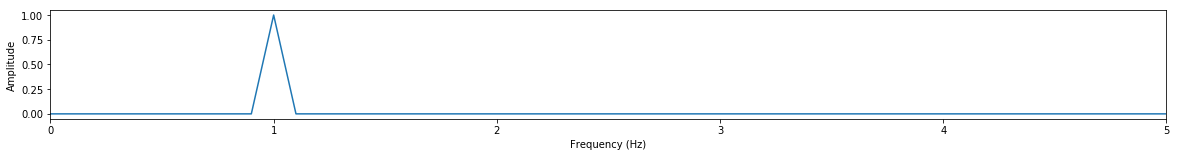

In [9]:
# Frequency domain representation, Signal 1
fft_signal_1 = fft(signal_1)/len(signal_1)           # Normalize amplitude
fft_signal_1 = fft_signal_1[range(int(len(signal_1)/2))] # Exclude sampling frequency

# Plot Signal 1
plt.figure(figsize=(20,2))
plt.plot(frequencies, abs(fft_signal_1))
plt.xlim(0, 5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

In [10]:
# Create a sine wave
def create_wave(ampl, freq, time): 
    signal= ampl*np.sin(2*np.pi*freq*time)
    
    # Frequency domain representation, Signal
    fft_signal = fft(signal)/len(signal)           # Normalize amplitude
    fft_signal = fft_signal[range(int(len(signal)/2))] # Exclude sampling frequency
    
    # Plot Signal
    plt.figure(figsize=(20,2))
    plt.plot(frequencies, abs(fft_signal))
    plt.xlim(0, 5)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    
    return fft_signal

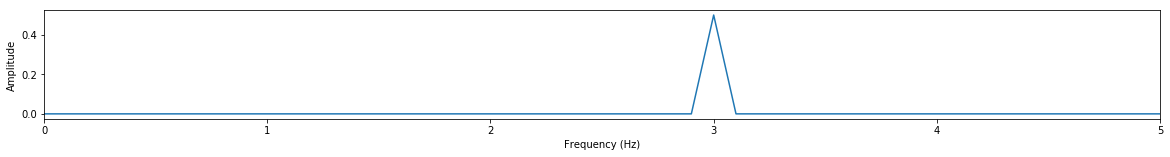

In [11]:
ton_1 = create_wave(1, 3, time)

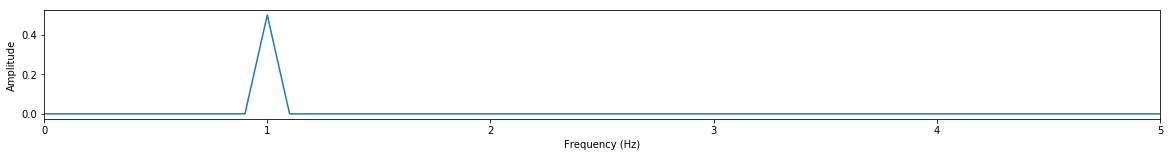

In [12]:
ton_2 = create_wave(1,1,time)

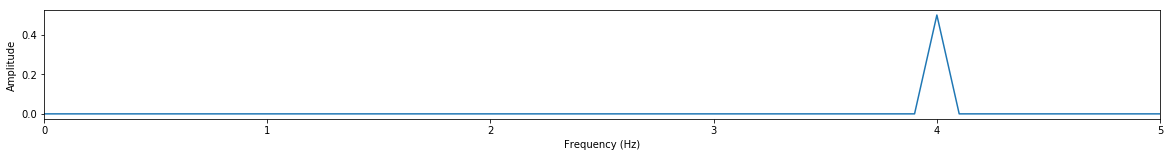

In [13]:
ton_3 = create_wave(1, 4,time)

In [14]:
mischsignal = abs(fourier_transform)